In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Die Fit Parameter a/b
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000149
1.0
1.0
1.0000000149
3.19430658662
2.67760227865
3.19430663422
2.67760227865
3.19430658662
2.67760231855
3.19430675095
2.67760162168
3.19430675095
2.67760162168
_______________________
Die Fit Parameter c/d
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000149
1.0
1.0
1.0000000149
0.0221769097934
17.8470297496
0.0221769101239
17.8470297496
0.0221769097934
17.8470300155
0.0221769001095
17.8470298205
0.0221769097934
17.8470297496


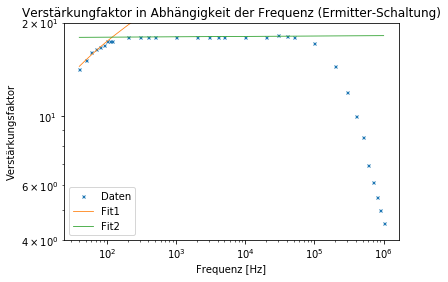

In [4]:
#frequency response
#ermitter circuit

#data

nu = np.array([40, 50, 60, 70, 80, 90, 100, 110, 120, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000])
nu_err= 0.00001*nu

U_in = 112
U_in_err = np.array([1.39, 1.49, 1.23, 1.36, 1.50, 1.43, 1.40, 1.34, 1.28, 1.51, 1.41, 1.15, 1.56, 1.20, 1.36, 1.57, 1.24, 1.28, 1.65, 1.35, 1.58, 1.21, 1.71, 1.17, 1.36, 1.20, 1.22, 1.41, 1.41, 1.66, 1.73, 1.28, 1.20])

U_out = np.array([1.59, 1.70, 1.80, 1.84, 1.87, 1.90, 1.95, 1.96, 1.96, 2.01, 2.01, 2.02, 2.02, 2.02, 2.02, 2.01, 2.02, 2.01, 2.02, 2.01, 2.04, 2.03, 2.02, 1.93, 1.63, 1.34, 1.12, 0.961, 0.779, 0.688, 0.615, 0.558, 0.508])
U_out_err = np.array([13.8, 13.9, 7.36, 10.4, 8.76, 12.2, 44.0, 10.7, 8.15, 9.45, 10.2, 7.63, 11.4, 9.77, 10.6, 9.80, 10.9, 10.4, 9.20, 10.6, 19.5, 16.9, 11.1, 10.9, 15.4, 11.5, 10.3, 10.7, 4.77, 4.76, 4.95, 5.70, 4.79])


V_U = U_out/(U_in*10**-3)
V_U_err = np.sqrt((U_out_err/U_in)**2+((U_in_err*10**-3)*U_out/(U_in*10**-3)**2)**2)

         
#plot
plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
#plt.errorbar(nu, V_U, xerr=nu_err, yerr=V_U_err, linestyle='', marker='x', markersize=0.8)        #to small to show
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')


print('Die Fit Parameter a/b')
#fit func to measured data 0:8
def fit_func_1(nu, a, b):
    print(a)
    print(b)
    return a*np.log(nu)+b



p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func_1, nu[0:8], V_U[0:8])

plt.loglog(nu, fit_func_1(nu, *popt), linewidth=0.8, label='Fit1')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')

print('_______________________')
print('Die Fit Parameter c/d')

#fit func to measured data 9:22
def fit_func_2(nu, c, d):
    print(c)
    print(d)
    return c*np.log(nu)+d
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func_2, nu[9:22], V_U[9:22])

#plot fit func
plt.loglog(nu, fit_func_2(nu, *popt), linewidth=0.8, label='Fit2')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.ylim([4E0, 2E1])
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz (Ermitter-Schaltung)')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\Universe\Praktikum\FP 1\E 01 - Elektronik Grundpraktikum/freqres.ermit.ET.pdf' ,format='PDF')
plt.show()


Die Fit Parameter e/f
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000149
1.0
1.0
1.0000000149
74.3057590103
304.758797594
74.3057601175
304.758797594
74.3057590103
304.758802135
244.122233558
-186.041731452
244.122237195
-186.041731452
244.122233558
-186.041728679
277.053225479
-324.789531816
277.053229608
-324.789531816
277.053225479
-324.789526976
277.053223431
-324.789524001
277.053225479
-324.789531816
____________________
Die Fit Parameter g/h
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000149
1.0
1.0
1.0000000149
1.9585970572
977.259289755
1.95859708639
977.259289755
1.9585970572
977.259304317
1.95859662467
977.259294051
1.9585970572
977.259289755


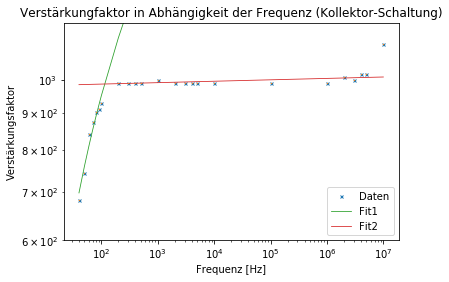

In [5]:
#frequency response
#collector circuit

#data

nu = np.array([40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 10000000])
nu_err= 0.00001*nu

U_in = np.array([112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 109, 110, 110, 110, 108])
U_in_err = np.array([1.56, 1.41, 1.03, 1.35, 1.28, 1.67, 1.37, 1.41, 1.48, 1.41, 1.33, 1.26, 1.38, 1.54, 1.45, 1.29, 1.46, 1.63, 1.12, 1.36, 1.54, 1.57, 1.60, 1.61])

U_out = np.array([76.4, 83.2, 94.1, 97.9, 101, 102, 104, 111, 111, 111, 111, 112, 111, 111, 111, 111, 111, 111, 111, 110, 110, 112, 112, 121])
U_out_err = np.array([0.638, 0.965, 1.58, 1.38, 1.55, 0.898, 1.30, 1.03, 1.19, 1.28, 1.39, 1.43, 1.29, 1.31, 1.05, 1.48, 1.65, 1.53, 1.27, 1.40, 1.43, 1.22, 1.54, 1.50])


V_U = U_out/(U_in*10**-3)
V_U_err = np.sqrt((U_out_err/U_in)**2+((U_in_err)*U_out/(U_in)**2)**2)

#plot
plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
plt.errorbar(nu, V_U, xerr=nu_err, yerr=V_U_err, linestyle='', marker='x', markersize=0.8)        #to small to show
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')

print('Die Fit Parameter e/f')
#fit func to measured data 0:7
def fit_func1(nu, e, f):
    print(e)
    print(f)
    return e*np.log(nu)+f

p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func1, nu[0:7], V_U[0:7])


plt.loglog(nu, fit_func_1(nu, *popt), linewidth=0.8, label='Fit1')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')

print('____________________')

print('Die Fit Parameter g/h')
#fit func to measured data 8:23
def fit_func2(nu, g, h):
    print(g)
    print(h)
    return g*np.log(nu)+h
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func2, nu[8:23], V_U[8:23])

#plot fit func
plt.loglog(nu, fit_func_2(nu, *popt), linewidth=0.8, label='Fit2')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.ylim([6E2, 1.2E3])
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz (Kollektor-Schaltung)')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\Universe\Praktikum\FP 1\E 01 - Elektronik Grundpraktikum/freqres.collect.ET.pdf' ,format='PDF')
plt.show()

